# 13. Revisiting the multi-spore experiments

## Numerical experiments - Week 17/2025

_Boyan Mihaylov, MSc Computational Science (UVA/VU)_

Having obtained more concrete estimates of the concentrations and diffusion coefficients of potential inhibitors, the quantitative effect of crowding on germination can be revisited in more detail. The computed reimaining inhibitor concentration in the spore under varying densities of regularly distributed spores can be related to statistical data from empirical experiments.

## Prerequisite libraries

In [1]:
using PyPlot
using Revise

Revise.includet("./conversions.jl")
Revise.includet("./diffusion.jl")
Revise.includet("./setup.jl")
Revise.includet("./plotting.jl")
Revise.includet("./analysis.jl")
using .Conversions
using .Diffusion
using .Setup
using .Plotting
using .Analysis

## 1. General assumptions

Previously, it was shown that the concentration threshold for germination inhibition in a single spore could lie anywhere between $10^{-10}$ and $10^{-6}\ \textrm{M}$. Matching these thresholds to effective permeation constants, diffusion simulations under increasing spore densities from $3\times 10^4$ to $3\times 10^9$ spores/mL are performed, recording the numerically estimated relaxation exponent and the inhibitor concentrations in the spores over the course of $t=12$ hours.

## 2. 3D spore grid

The most simple setup assumes a regular three-dimensional grid of spores or, equivalently, a triply periodic lattice. The different spore arrangements are visualised below.

Effective density: 2.7e-8 spores/micrometer^3
Populating volume of 1000000000 micrometers^3 with 29.999999999999996 spores, 3 spores per dimension
Spore spacing: 333.3333333333333 micrometers
Effective density: 6.4e-8 spores/micrometer^3
Populating volume of 1000000000 micrometers^3 with 53.348382301167675 spores, 4 spores per dimension
Spore spacing: 250.0 micrometers
Effective density: 1.25e-7 spores/micrometer^3
Populating volume of 1000000000 micrometers^3 with 94.86832980505137 spores, 5 spores per dimension
Spore spacing: 200.0 micrometers
Effective density: 2.16e-7 spores/micrometer^3
Populating volume of 1000000000 micrometers^3 with 168.70239755710472 spores, 6 spores per dimension
Spore spacing: 166.66666666666666 micrometers
Effective density: 3.43e-7 spores/micrometer^3
Populating volume of 1000000000 micrometers^3 with 300.0 spores, 7 spores per dimension
Spore spacing: 142.85714285714286 micrometers
Effective density: 5.12e-7 spores/micrometer^3
Populating volume of 10000

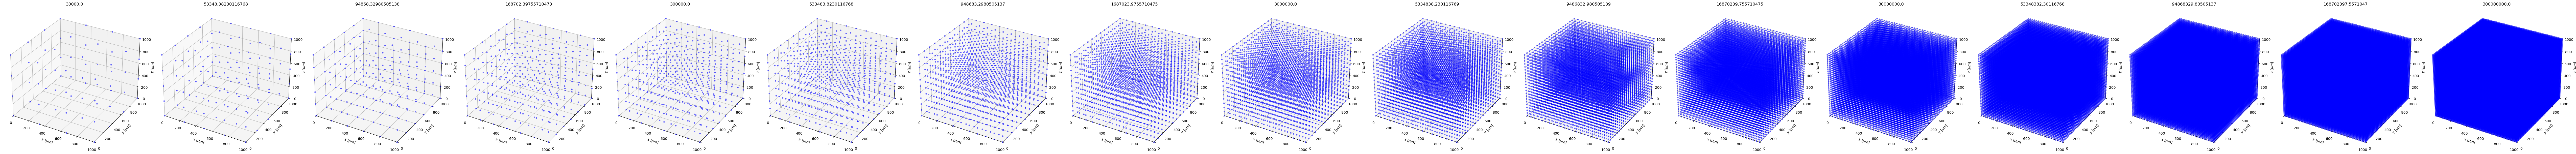

In [54]:
spore_densities = 3 * 10 .^ (4:0.25:8)

spore_arrangements = []
labels = []
for spore_density in spore_densities
    spore_coords, spore_spacing = generate_spore_positions(spore_density, 1000, 1000, base_height=nothing)
    push!(spore_arrangements, spore_coords)
    push!(labels, "density = $spore_density,\\spacing = $spore_spacing")
end

plot_spore_arrangements(1000, 1000, spore_arrangements, spore_densities)

# References